# 사전 학습된 질병 분류기 모델
- https://github.com/manthan89-py/Plant-Disease-Detection/tree/main

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## manthan89의 질병 분류기 모델
- https://github.com/manthan89-py/Plant-Disease-Detection/tree/main

### 이미 학습된 모델 다운로드

In [ ]:
!git clone https://github.com/manthan89-py/Plant-Disease-Detection.git

Cloning into 'Plant-Disease-Detection'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 418 (delta 41), reused 61 (delta 32), pack-reused 340
Receiving objects: 100% (418/418), 18.03 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (181/181), done.


### 필요 라이브러리 다운

In [ ]:
import torch
from torchvision import datasets, transforms, models  # datsets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
from PIL import Image
import torchvision.transforms.functional as TF
import pandas as pd
import numpy as np

### 모델 구조 정의
- CNN 사용
- pytorch 사용

In [ ]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

### 신경망 모델 생성 및 가중치 로드

In [ ]:
# targets_size는 분류할수 있는 클래스의 개수이다
targets_size = 39
model = CNN(targets_size)
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/Project/PlantDiseaseDetection/plant_disease_model_1_latest.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [ ]:
# 생성한 신경망 요약
from torchsummary import summary
input_size = (3, 224, 224)
summary(model,input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1, 64,

### 식물 사진을 기반한 식물 질병 진단


In [ ]:
# 각각의 분류할 수 있는 식물 질병 클래스들의 상세 정보
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/PlantDiseaseDetection/disease_info.csv", encoding="cp1252")

In [ ]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[9:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

In [ ]:
single_prediction("/content/Plant-Disease-Detection/test_images/corn_common_rust.JPG")

Original :  Plant-Disease-Detection/test_images/corn_common_rust
Corn : Common Rust


## AI hub 시설 작물 질병 진단 이미지 기반 질병 분류기 모델
- https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=153

### 필요 라이브러리 다운


In [2]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import torch
from torch.utils.data import DataLoader
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.nn.parallel import DistributedDataParallel

### config.py
- 작물 질병 분류 모델 설정
  - 질병코드
    - 00 : 정상
    - 16 : 참외노균병
    - 17 : 참외흰가루병

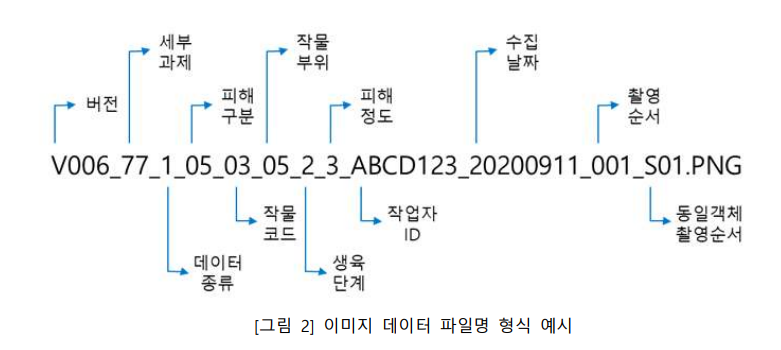

In [3]:
class config():
    path_prefix = '.'
    path_data = 'dataset'

    # {작물 코드 : {피해 구분(질병 코드)}}
    dict_label = {'10': {'00': 0, '16': 1, '17': 2}}

    # general args
    gpu = 0
    train_size = (512, 512)
    train_model = 'resnet50' #'ENet'
    pnum = 77 # 세부 과제 코드 (77: 시설 작물 질병, 78: 노지작물 해충 등등)
    crop_name = '10' # 작물 코드 - 10 = 참외
    num_classes = 3 # 질병이 3개라

    # testing args
    test_model_path = 'weights/sample.pt'

cfg = config()

### utils.py
-  폴더에 있는 이미지 및 라벨 데이터를 처리하는 유틸리티
  - make_data(path,phase): 지정된 폴더에서 이미지 파일 경로를 수집하여 리스트로 반환합니다.
    - 파일구조 : {경로}/TEST/[이미지 파일들]
    * 어노테이션 파일(.json)들도 같은 폴더에 둔다.
  - cnt_correct(y_true, y_pred): 예측된 결과와 실제 레이블을 기반으로 정확하게 분류된 샘플 수를 계산합니다.
  - log_with_timestamp(msg):현재 시간과 함께 메시지를 출력합니다.
  - bash_cmd(cmd): 주어진 bash 명령을 실행합니다.

In [4]:
# import os
# import numpy as np
# import torch
import datetime
class utils():
  def make_data(self, path, phase='train'):
      path_images = []

      for img_name in os.listdir(f'{path}/{phase}'):
          if img_name.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG')):
              path_images.append(f'{path}/{phase}/{img_name}')

      return np.stack(path_images)

  # y_true는 실제 레이블과 y_pred는 예측 결과이다.
  def cnt_correct(self,y_true, y_pred):
      # topk함수는 텐서 메소드중 하나로 주어진 텐서에서 가장 큰 값 또는 가장 작은 값 및 해당 인덱스를 반환
      # topk(k, dim=None, largest=True, sorted=True)이 형식으로 K는 몇개의 요소를 반환할지 정한다.
      # 값과 인덱스를 반환한다.
      top_N, top_class = y_pred.topk(1, dim=-1)
      # view함수는 텐서의 차원을 변경하는 함수로 topclass와 y_true를 비교하기위해 같은 차원으로 변환후 비교하는 것이다.
      equals = top_class == y_true.view(*top_class.shape)
      return torch.sum(equals.type(torch.FloatTensor)).item()

  def log_with_timestamp(self,msg):
      print(f'{datetime.datetime.today()} : {msg}')

  def bash_cmd(self,cmd):
      print()
      _ = os.system(cmd)
      print()
utils = utils()

### models.py
  - 지정된 백본 네트워크와 분류 레이어를 사용하여 모델을 생성합니다.

    Args:
        model_name (str): 사용할 백본 네트워크의 이름. 기본값은 'resnet50'입니다.
        num_classes (int): 모델의 출력 클래스 수. 기본값은 3입니다.
        pretrained (bool): True로 설정하면 백본 네트워크에 대해 사전 학습된 가중치를 사용합니다. 기본값은 False입니다.

    Returns:
        torch.nn.Module: 생성된 모델.
    

In [5]:
import torch.nn as nn
import torchvision.models as models

dict_backbone = {'resnet50' : models.resnet50}

def get_model(model_name='resnet50', num_classes=3, pretrained=False): # use pretrained backbone
    # assert는 뒤에 조건이 True가 아니면 error 발생
    assert model_name in dict_backbone.keys()

    # 지정된 백본 네트워크(resnet)을 사용하여 네트워크 생성 - pretrained가 False면 사전 학습된 가중치로 초기화 하지 않는다.
    network = dict_backbone[model_name](pretrained=pretrained)

    # 새로운 분류 레이어를 추가하여 모델을 완성합니다.
    # 백본 네트워크의 마지막 레이어는 원래 데이터셋의 클래스 수에 맞게 설계되어 있습니다.
    # 하지만 우리의 경우에는 새로운 클래스 수에 맞게 분류 레이어를 변경해야 합니다.
    network.fc = nn.Linear(network.fc.in_features, num_classes)

    return network

### transforms.py
- 이미지 데이터에 대한 전처리 및 정규화

In [6]:
# 이미지 데이터 증강 라이브러리
import albumentations


# 평균 및 표준편차를 이용하여 픽셀값을 정규화하고 픽셀 값을 [0,1]로 조정
# p=1.0은 각 변환에 적용되는 확률을 나타내는것으로 확률이 1인것은 정규화 변환은 항상 적용되는것이다.
test_aug = albumentations.Compose([albumentations.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225],
                                                             max_pixel_value=255.0,
                                                             p=1.0)
                                   ],
                                   p=1.0)

### Datasets.py
-  CustomDataSet 클래스는 사용자 정의 데이터셋을 정의하며, 이미지 파일 경로와 해당 이미지에 대한 라벨 정보를 사용하여 데이터를 로드하고 전처리합니다.

In [7]:
import cv2
import json

from torch.utils.data import Dataset

class CustomDataSet(Dataset):
    def __init__(self, path_images, transform, test=False):
        self.path_images = path_images
        self.transform = transform
        self.test = test

    def __len__(self):
        return len(self.path_images)

    # 주어진 인덱스에 해당하는 데이터를 반환하는 함수
    def __getitem__(self, index):
        # 경로에 있는 이미지 불러오기
        image = cv2.imread(self.path_images[index])[:,:,::-1]

        # 같은 경로에 있는 json파일도 같이 읽는다
        with open(f'{self.path_images[index]}.json') as json_file:
            json_decoded = json.load(json_file)
        # 어노테이션을 읽은후 label에 저장한다 {"작물코드":"질병 코드"}
        label = cfg.dict_label[f'{int(json_decoded["annotations"]["crop"]):02d}'][f'{int(json_decoded["annotations"]["disease"]):02d}']

        # image 크기를 resize(train_size)하고 전처리한다.
        resized_image = cv2.resize(image, cfg.train_size, interpolation = cv2.INTER_LANCZOS4) # INTER_AREA
        # 이전에 정의했던 transform으로 이미지를 정규화한다.
        augmented_image = self.transform(image=resized_image)['image']

        # image데이터를 모델 인풋에 맞는 형태로 변환해줘야한다.
        # 모델 input은 tenser형태로 입력되어야된다.
        # 기존 이미지는 높이-너비-채널 순서로 표현되었다면 transpose()함수로 pyTorch에 맞는 채널-높이-너비 순서로 변환해주어야한다.
        # 튜플형태로 (이미지, 라벨) 형태로 반환한다.

        if not self.test: # test단계가 아닐경우
            # 이미지와 라벨정보만을 반환
            return torch.tensor(augmented_image.transpose(2,0,1)), torch.tensor(label).long()
        else: # test 단계라면 이미지 경로도 같이 반환한다.
            return torch.tensor(augmented_image.transpose(2,0,1)), torch.tensor(label).long(), self.path_images[index]

### test.py
- 주어진 모델을 사용하여 검증 데이터셋을 평가합니다.

  Args:
      model (torch.nn.Module): 평가할 모델.
      valid_loader (torch.utils.data.DataLoader): 검증 데이터 로더.
      criterion (torch.nn.Module): 손실 함수.

  Returns:
      float: 평균 손실.
      float: 정확도.
      numpy.ndarray: 실제 라벨.
      numpy.ndarray: 예측 라벨.

In [8]:
is_cuda = torch.cuda.is_available()
os.environ['CUDA_VISIBLE_DEVICES'] = str(cfg.gpu)

def test(model, valid_loader, criterion):
    # 평가 모드 전환
    model.eval()

    list_true = []
    list_pred = []

    # 총 손실값
    loss_sum = 0
    # 예측 성공한 이미지 개수
    correct_sum = 0

    # 진행도를 체크하기위해 전체 데이터셋의 개수를 5로 나눈후 나머지를 구한다.
    log_every = len(valid_loader)//5

    # 테스트하는 이미지 개수
    len_data = 0

    utils.log_with_timestamp(f'Test ... 0%')

    for i, (image, label, name) in enumerate(valid_loader):
        # GPU가 있을시 데이터를 GPU로 이동시
        if is_cuda and cfg.gpu is not None:
            image = image.cuda(cfg.gpu, non_blocking=True)
            label = label.cuda(cfg.gpu, non_blocking=True)

        pred = model(image)

        # 손실함수 값 구함
        loss = criterion(pred, label)
        # 총 손실함수 값에 더함
        loss_sum += loss.item()

        # 이번 데이터 셋에 있는 데이터 개수를 더함
        len_data += image.shape[0]
        # 예측이 맞은 사진 개수를 구함
        correct_sum += utils.cnt_correct(label, pred)

        # cpu()는 gpu에서 계산된 결과를 cpu로 이동시키는 함수이다.
        list_true.append(label.detach().cpu().numpy().flatten())
        list_pred.append(pred.detach().cpu().numpy().argmax(-1).flatten())


        # 주기마다 진행도를 출력
        if (i+1)%log_every == 0:
            utils.log_with_timestamp(f'Test ... {((i+1)//log_every)*20}%')

    return loss_sum/len_data, correct_sum/len_data, np.concatenate(list_true, axis=0), np.concatenate(list_pred, axis=0)


### 테스트 셋 이미지 예측

In [ ]:
pnum = cfg.pnum # 세부 과제
crop_name = cfg.crop_name # 작물 코드

path_images_test = utils.make_data(f'/content/drive/MyDrive/Colab Notebooks/Project/PlantDiseaseDetection/AI_hub_model', 'Test')


def main():
    print('========= Test Environment =========\n')
    _ = utils.bash_cmd('cat /proc/cpuinfo | grep "model name" | uniq')
    _ = utils.bash_cmd('nvidia-smi')
    _ = utils.bash_cmd('free -h')
    _ = utils.bash_cmd('df /')
    _ = utils.bash_cmd('cat /etc/os-release')

    print('\nPyTorch version: ', torch.__version__, '\n')

    utils.log_with_timestamp('Model loading ... ')
    model = get_model(cfg.train_model, cfg.num_classes)
    # 가중치 불러오기
    ckpt = torch.load('/content/drive/MyDrive/Colab Notebooks/Project/PlantDiseaseDetection/sample.pt', map_location='cpu')
    model.load_state_dict(ckpt['model_state_dict'])

    utils.log_with_timestamp('Model compiling ... ')
    # 손실함수
    criterion = torch.nn.CrossEntropyLoss()

    if cfg.gpu is not None and is_cuda:
        utils.log_with_timestamp(f"Use GPU: {cfg.gpu} for testing")
        torch.cuda.set_device(cfg.gpu)
        model = model.cuda(cfg.gpu)
    else:
        utils.log_with_timestamp('Use CPU, this will be slow')

    # 데이터 로더(DataSet = CustomDataSet, batchsize = 1(검증단계라서), shuffle = X)
    test_loader = DataLoader(CustomDataSet(path_images_test, test_aug, test=True), batch_size=1, shuffle=False, num_workers=0)

    print('\n===== Start testing =====\n')
    test_loss, test_acc, list_true, list_pred = test(model, test_loader, criterion)

    print('\n===== Test result =====\n')
    print(classification_report(list_true, list_pred, digits=5))
    print('\n========= Confusion Matrix =========\n')
    for rr in confusion_matrix(list_true, list_pred):
        print(rr)

    print('\nLog csv ... ')
    df = pd.DataFrame({'image_name': path_images_test,
                       'true': list_true,
                       'pred': list_pred})

    df.to_csv(f'{pnum}_{crop_name}_log_each_sample.csv')

    print('\n===== Finished testing =====')

    _ = utils.bash_cmd('sh rm_cache.sh')

if __name__ == '__main__':
    main()

========= Test Environment =========












PyTorch version:  2.2.1+cu121 

2024-05-11 16:58:18.203673 : Model loading ... 
2024-05-11 16:58:19.495254 : Model compiling ... 
2024-05-11 16:58:19.495566 : Use CPU, this will be slow

===== Start testing =====

2024-05-11 16:58:19.497231 : Test ... 0%
2024-05-11 16:58:21.884663 : Test ... 20%
2024-05-11 16:58:25.115209 : Test ... 40%
2024-05-11 16:58:27.570195 : Test ... 60%
2024-05-11 16:58:29.807526 : Test ... 80%
2024-05-11 16:58:31.517053 : Test ... 100%
2024-05-11 16:58:33.254349 : Test ... 120%

===== Test result =====

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000         3
           1    1.00000   1.00000   1.00000         3

    accuracy                        1.00000         6
   macro avg    1.00000   1.00000   1.00000         6
weighted avg    1.00000   1.00000   1.00000         6


========= Confusion Matrix =========

[3 0]
[0 3]

Log csv ... 

===== Finished testing 

#### 단일 식물 이미지 예측
- 한개의 이미지를 입력 후 질병 예측

2024-05-20 02:24:57.653516 : Model loading ... 


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


2024-05-20 02:25:04.506148 : Model compiling ... 
2024-05-20 02:25:04.507328 : Use CPU, this will be slow


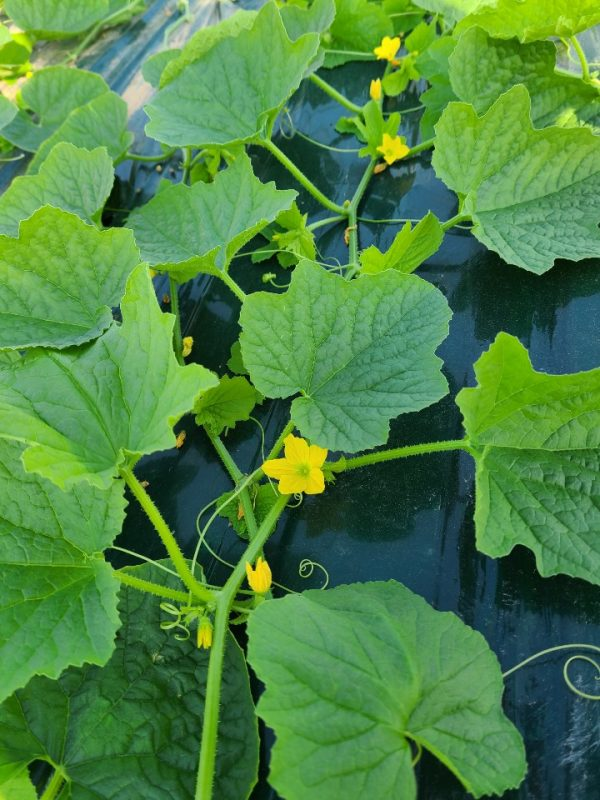

[0]


In [9]:
from google.colab.patches import cv2_imshow

# /content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/test_img/des{00,16,17}.jpg

pnum = cfg.pnum # 세부 과제
crop_name = cfg.crop_name # 작물 코드

image_path="/content/drive/MyDrive/Colab Notebooks/Project/Chungbuk University/Capstone Design/AI_Model/PlantDiseaseDetection/data/test_img/des00.jpg"

# 단일 식물 이미지 가져오기
show_image = cv2.imread(image_path)
image = cv2.imread(image_path)[:,:,::-1]
# image 크기를 resize(train_size)한다.
resized_image = cv2.resize(image, cfg.train_size, interpolation = cv2.INTER_LANCZOS4) # INTER_AREA
# 이전에 정의했던 transform으로 이미지를 정규화한다.
augmented_image = test_aug(image=resized_image)['image']
# 정규화 된 이미지는 높이-너비-채널 순서로 표현되었다면 transpose()함수로 pyTorch에 맞는 채널-높이-너비 순서로 변환해주어야한다.
image = torch.tensor(augmented_image.transpose(2,0,1))
# 신경망 모델이 일반적으로 (배치 크기, 채널 수, 높이, 너비) 이지만 단일 식물 이미지를 예측하기위해선 배치 크기는 1로 고정이다.
# image 변수에 차원은 (채널,높이,너비)이므로 unsqueeze로 (1, 채널 수, 높이, 너비)로 차원을 추가해준다.
image = image.unsqueeze(0)

# 모델 불러오기
utils.log_with_timestamp('Model loading ... ')
model = get_model(cfg.train_model, cfg.num_classes)
# 가중치 불러오기
ckpt = torch.load('/content/drive/MyDrive/Colab Notebooks/Project/PlantDiseaseDetection/sample.pt', map_location='cpu')
model.load_state_dict(ckpt['model_state_dict'])

utils.log_with_timestamp('Model compiling ... ')

if cfg.gpu is not None and is_cuda:
    utils.log_with_timestamp(f"Use GPU: {cfg.gpu} for testing")
    torch.cuda.set_device(cfg.gpu)
    model = model.cuda(cfg.gpu)
else:
    utils.log_with_timestamp('Use CPU, this will be slow')


if is_cuda and cfg.gpu is not None:
    image = image.cuda(cfg.gpu, non_blocking=True)

pred = model(image)
pred.detach().cpu().numpy().argmax(-1).flatten()
cv2_imshow(show_image);
print(pred.detach().cpu().numpy().argmax(-1).flatten())